# `MNIST` with an ANN using Keras
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

Load in the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers

# Obtain the `MNIST` data

In [2]:
# Load the MNIST data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Load the fashion MNIST data and split it between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# EDA: Take a look at a sample

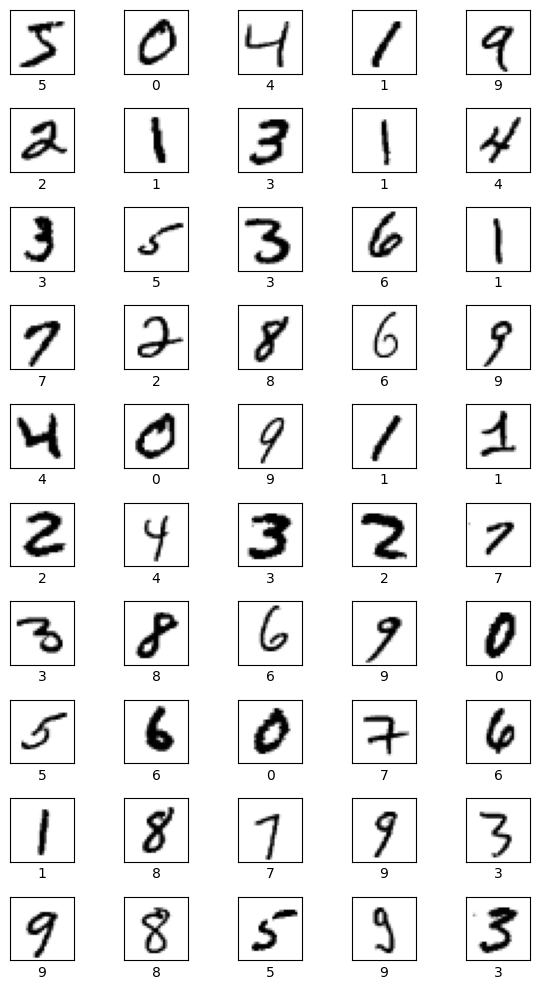

In [3]:
plt.figure(figsize=(6,10))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()

# Data prep: scaling

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices for use with categorical_crossentropy
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


# Model: Two hidden layers of 16 neurons

In [5]:
model = keras.Sequential([
  layers.Input(shape=input_shape),
  layers.Flatten(),                       # to go from 2D to 1D, i.e. convert from 28x28 to 784x1
  layers.Dense(16, activation='sigmoid'), # also try using a 'relu' instead of 'sigmoid'
  layers.Dense(16, activation='sigmoid'), # also try using a 'relu' instead of 'sigmoid'
  layers.Dense(num_classes, activation='softmax'),
])

In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=0.01), # default = 0.01
             # optimizer = keras.optimizers.RMSprop(learning_rate=0.001), # default = 0.001
             # optimizer = keras.optimizers.Adam(learning_rate=0.001,), # default = 0.001
              metrics=["accuracy"])

In [7]:
model.layers # report all of the layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [8]:
model.layers[0] # take a look at the first layer

<Flatten name=flatten, built=True>

# Visualize our neural network

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

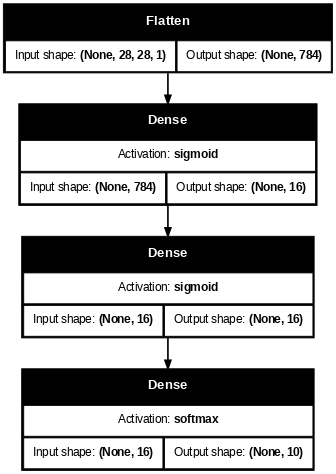

In [10]:
keras.utils.plot_model(model,
           show_shapes=True,
           show_layer_activations=True,
           dpi=60,)

# Training
Note that we start with 60_000 training samples, and 20% are used for the validation_split
thus 48_000 / 128 = 375 (where here 128 is our batch_size, you can explore changing this)
so each epoch (iteration) will use **375 mini-batches** (sub-samples) to perform gradient descent for a complete sweep through all of  the training data.

In [11]:
%%time

batch_size = 128
epochs = 15

history = model.fit(x_train, y_train,
                    batch_size       = batch_size,
                    epochs           = epochs,
                    validation_split = 0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1322 - loss: 2.3399 - val_accuracy: 0.1909 - val_loss: 2.2891
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1842 - loss: 2.2825 - val_accuracy: 0.1717 - val_loss: 2.2668
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1930 - loss: 2.2603 - val_accuracy: 0.2391 - val_loss: 2.2436
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2490 - loss: 2.2363 - val_accuracy: 0.2911 - val_loss: 2.2160
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3016 - loss: 2.2081 - val_accuracy: 0.3241 - val_loss: 2.1823
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3409 - loss: 2.1719 - val_accuracy: 0.3726 - val_loss: 2.1404
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3797 - loss: 2.1296 - val_accuracy: 0.4059 - val_loss: 2.0897
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4017 - loss: 2.0758 - val_accuracy: 0.

## Performance evaluation on the `X_test` data

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test cost:", score[0])
print("Test accuracy:", score[1])

Test cost: 1.5475879907608032
Test accuracy: 0.5353999733924866


## Training curves

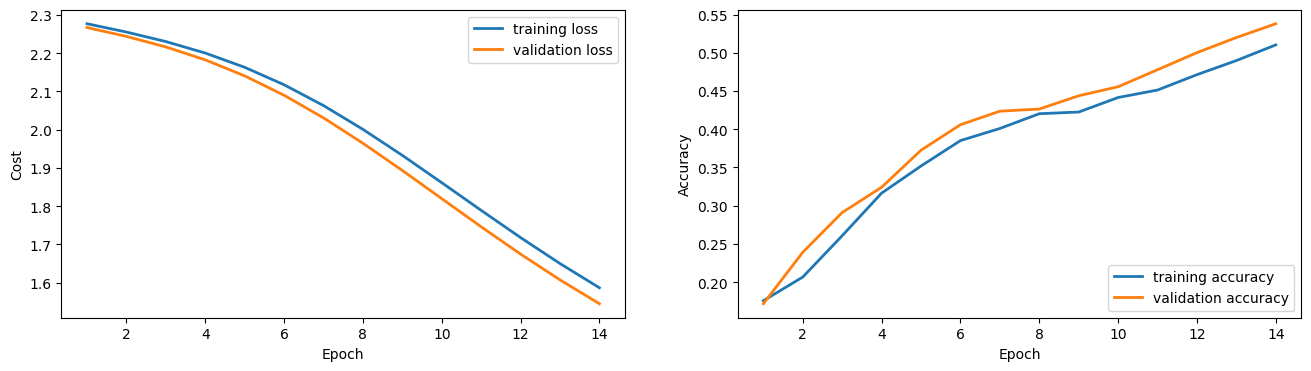

In [13]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[1:,"val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

## Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# predict
y_prediction = model.predict(x_test)

y_pred_classes = np.argmax(y_prediction, axis = 1)
# convert validation probabilities to one hot vectors
y_true = np.argmax(y_test, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_true, y_pred_classes , normalize='pred')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


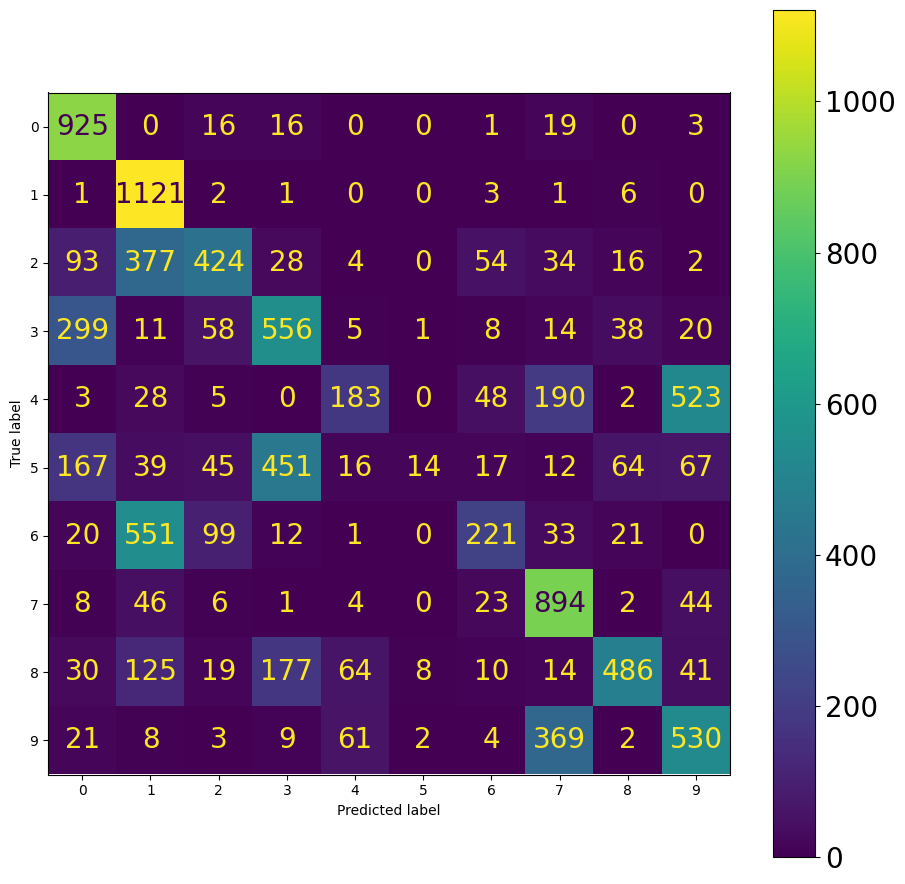

In [15]:
cm = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(11,11))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.rcParams.update({'font.size': 20})
disp.plot(ax=ax);

## Single valued performance metrics

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred_classes)

0.5354

In [17]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true, y_pred_classes)

np.float64(0.492640755655944)

### Annex

In [18]:
print("Upper sum:", np.triu(cm, k=1).sum() )
print("Lower sum:", np.tril(cm, k=-1).sum() )

Upper sum: 1356
Lower sum: 3290
